# K-Means Clustering

## Importing the libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [10]:
dataset = pd.read_csv('Iris.csv')
dataset['Species'].unique()
X = pd.DataFrame(dataset)
X = X.drop(columns=['Id','Species'])
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Using the elbow method to find the optimal number of clusters

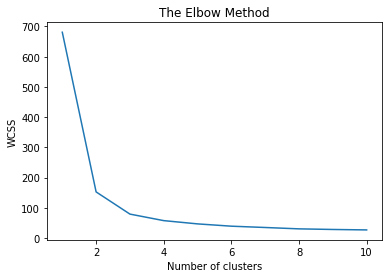

In [11]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [12]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## Visualising the clusters

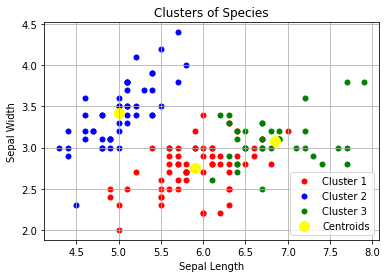

In [16]:
x = X.iloc[:, [0,1,2,3]].values

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 25, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 25, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 25, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Species')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.grid()
plt.show()